In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [36]:
train_df = pd.read_csv('dataset/train.csv')
test_df= pd.read_csv('dataset/test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
train_df= train_df.drop('Id',axis=1)

In [38]:
print(train_df.shape)

(1460, 80)


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [40]:
train_df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
columns = train_df.columns
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [42]:
df = train_df
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [43]:
interested_features = ['SalePrice','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','GarageArea', 'TotalBsmtSF', 'FullBath', 'HalfBath','BsmtHalfBath','BsmtFullBath','BedroomAbvGr']


In [44]:
train_df = train_df[interested_features]
test_df = test_df[interested_features[1:]]


In [45]:
train_df.head()

,SalePrice,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,GrLivArea,GarageArea,TotalBsmtSF,FullBath,HalfBath,BsmtHalfBath,BsmtFullBath,BedroomAbvGr
0,208500,856,854,706,0,1710,548,856,2,1,0,1,3
1,181500,1262,0,978,0,1262,460,1262,2,0,1,0,3
2,223500,920,866,486,0,1786,608,920,2,1,0,1,3
3,140000,961,756,216,0,1717,642,756,1,0,0,1,3
4,250000,1145,1053,655,0,2198,836,1145,2,1,0,1,4


In [46]:
test_df.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,GrLivArea,GarageArea,TotalBsmtSF,FullBath,HalfBath,BsmtHalfBath,BsmtFullBath,BedroomAbvGr
0,896,0,468.0,144.0,896,730.0,882.0,1,0,0.0,0.0,2
1,1329,0,923.0,0.0,1329,312.0,1329.0,1,1,0.0,0.0,3
2,928,701,791.0,0.0,1629,482.0,928.0,2,1,0.0,0.0,3
3,926,678,602.0,0.0,1604,470.0,926.0,2,1,0.0,0.0,3
4,1280,0,263.0,0.0,1280,506.0,1280.0,2,0,0.0,0.0,2


<Axes: >

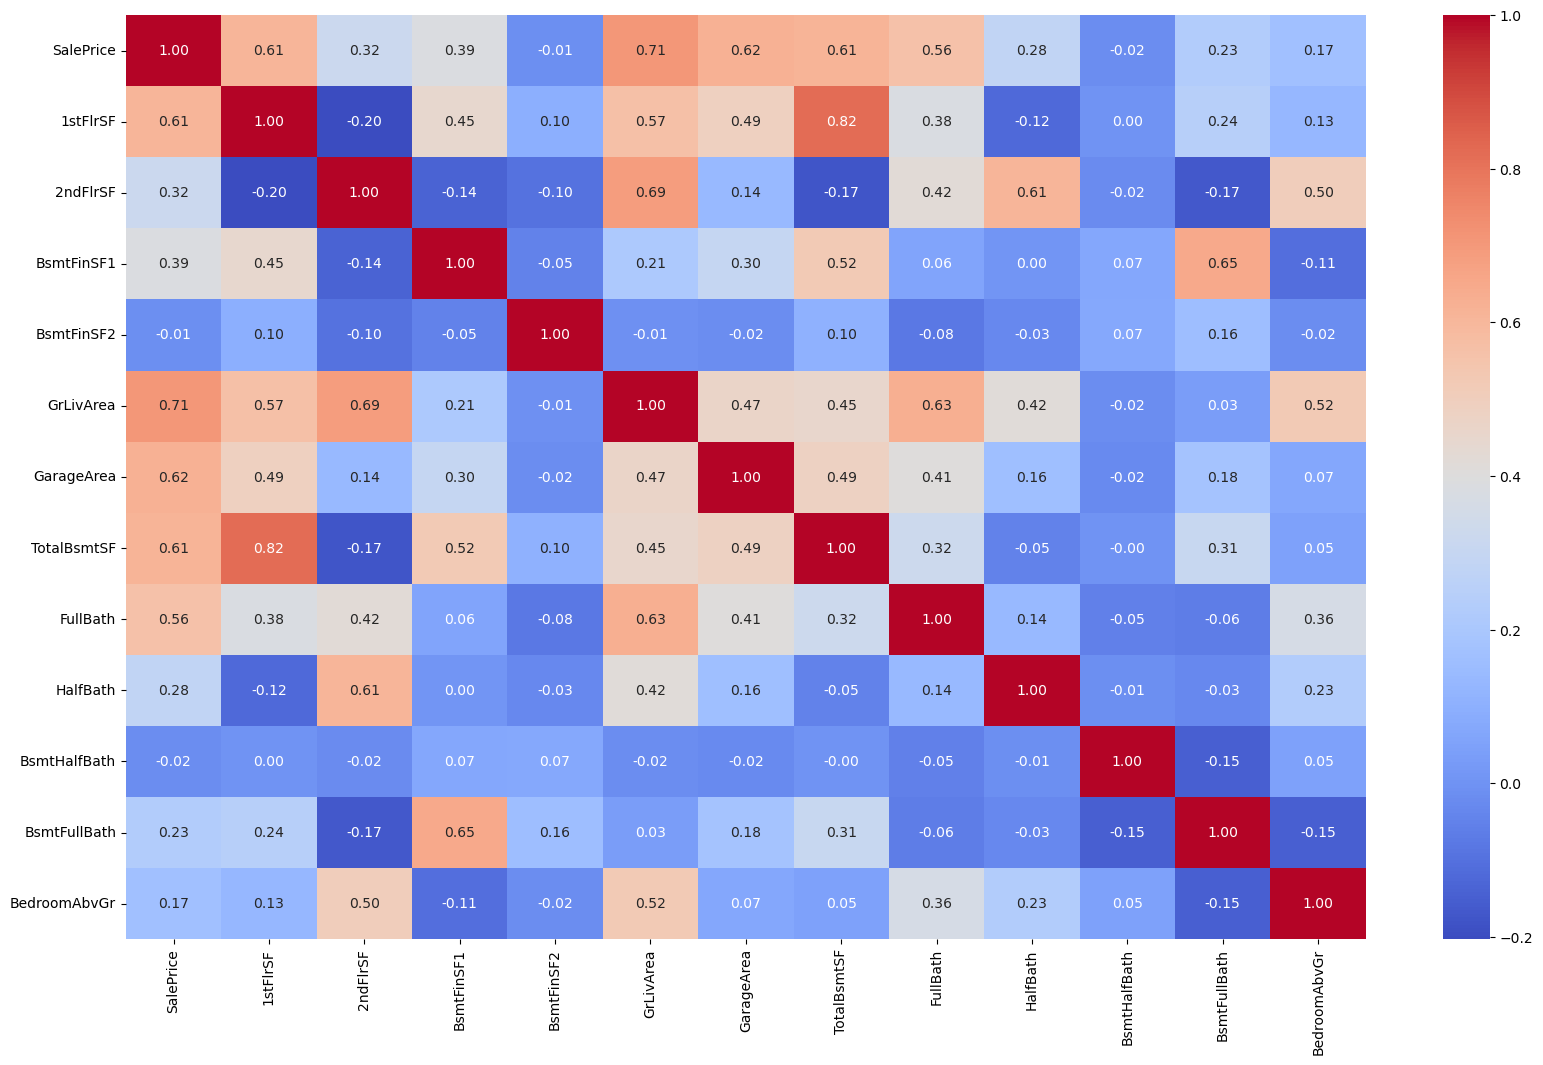

In [47]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


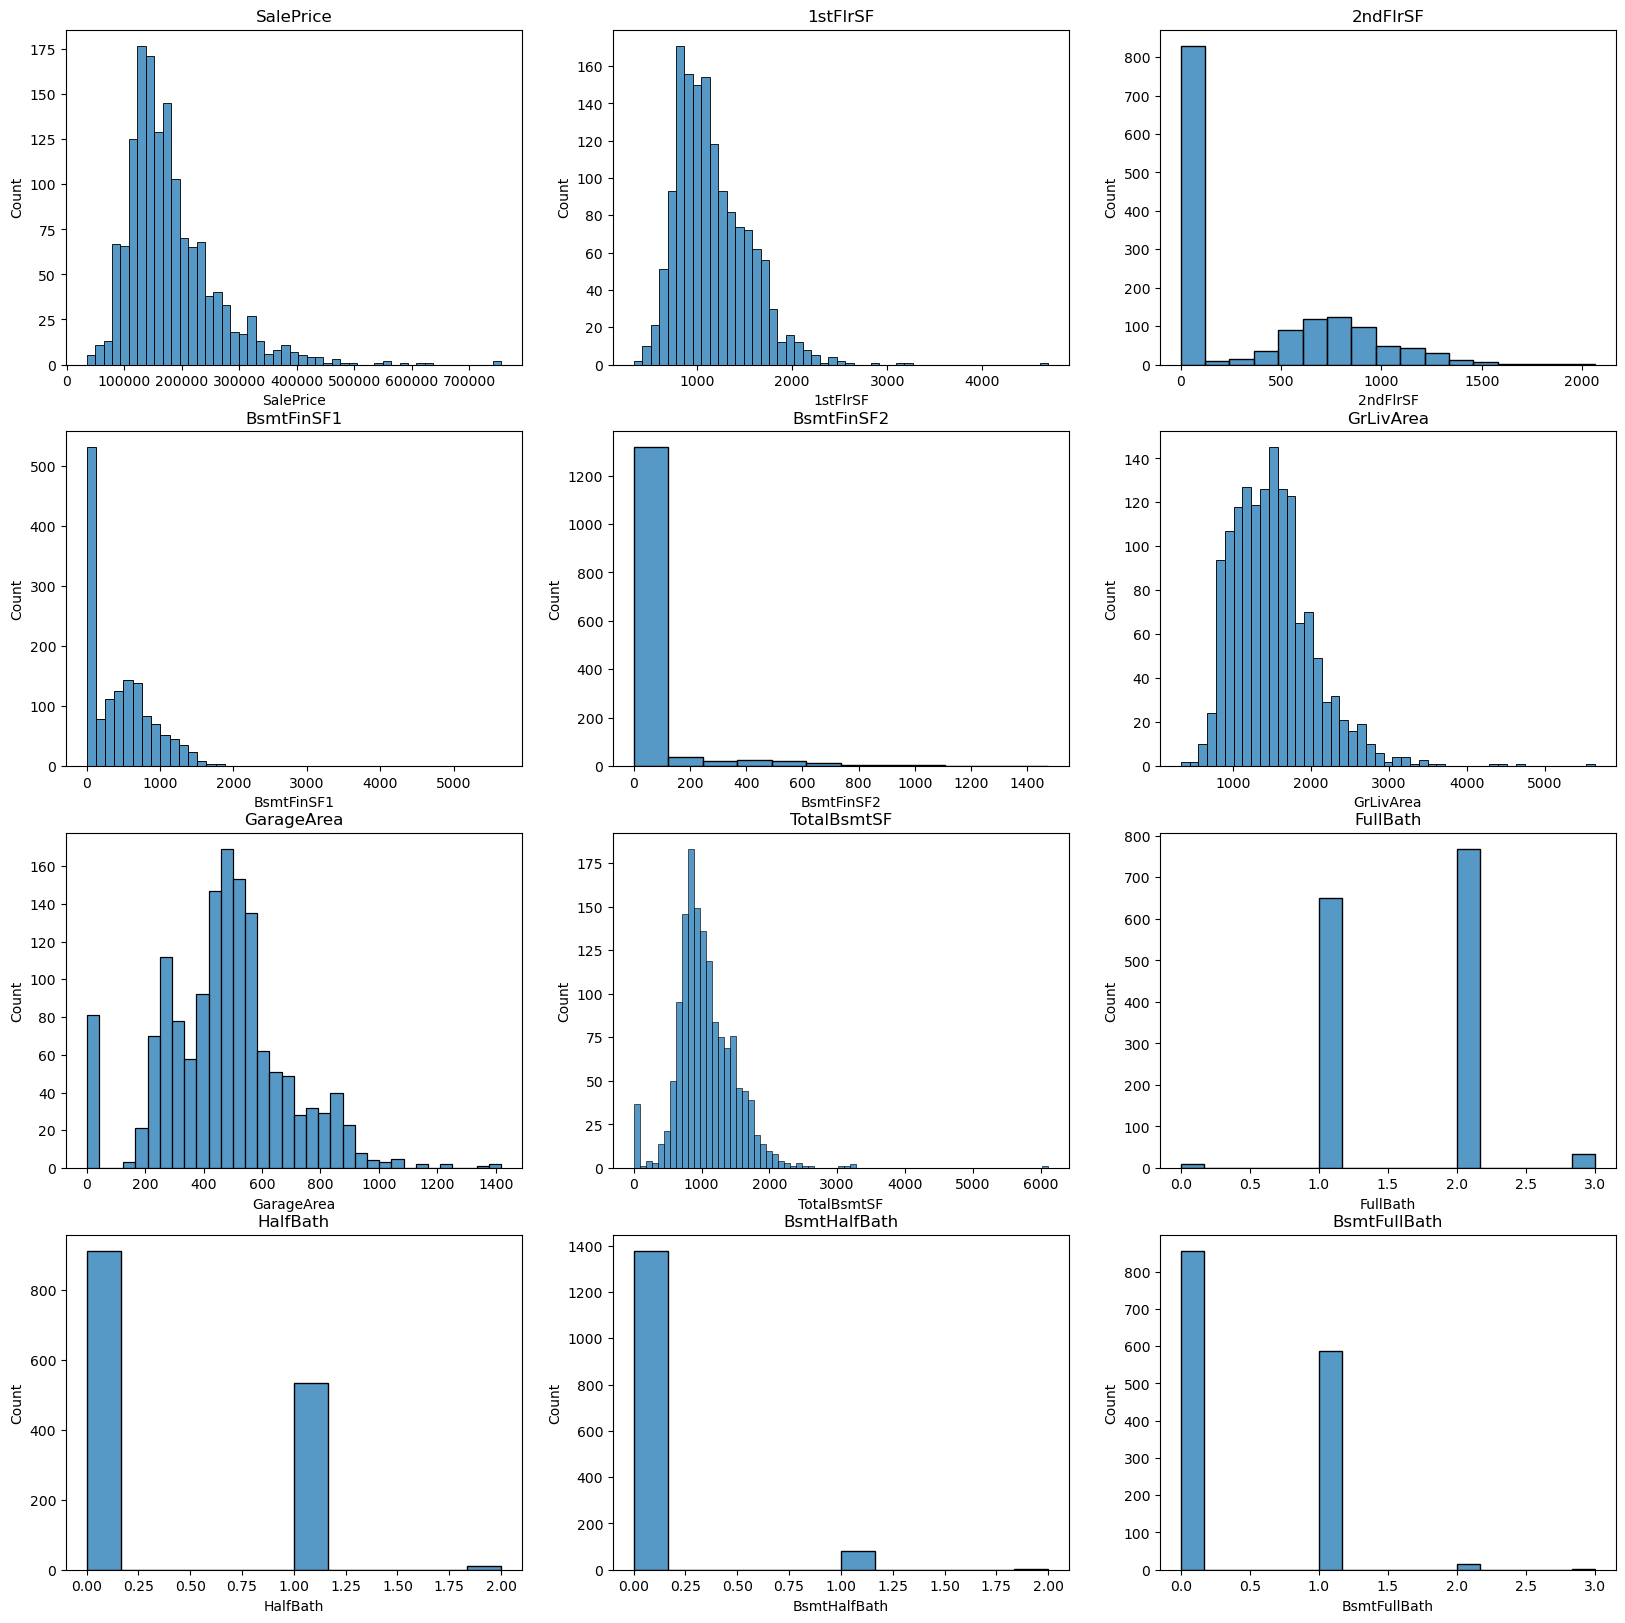

In [48]:
fig, ax = plt.subplots(4,3, figsize=(20,20))
for i, ax in enumerate(ax.flat):
    if i < len(interested_features):
        sns.histplot(train_df[interested_features[i]], ax=ax)
        ax.set_title(interested_features[i])

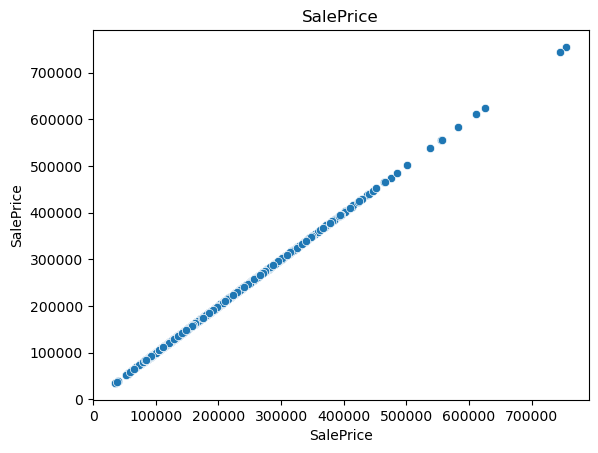

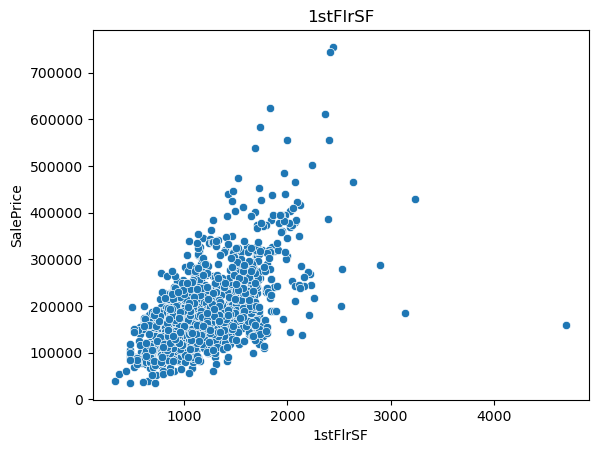

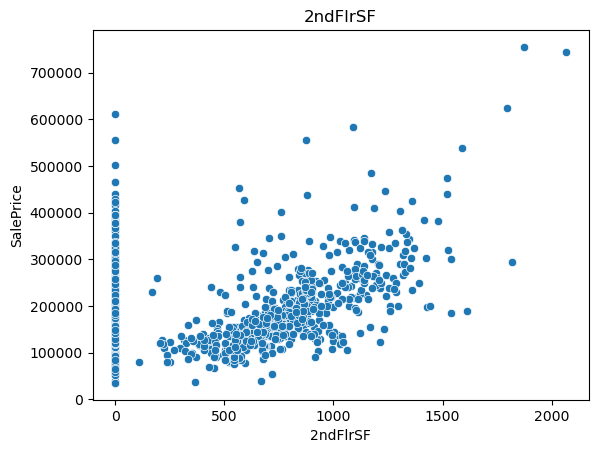

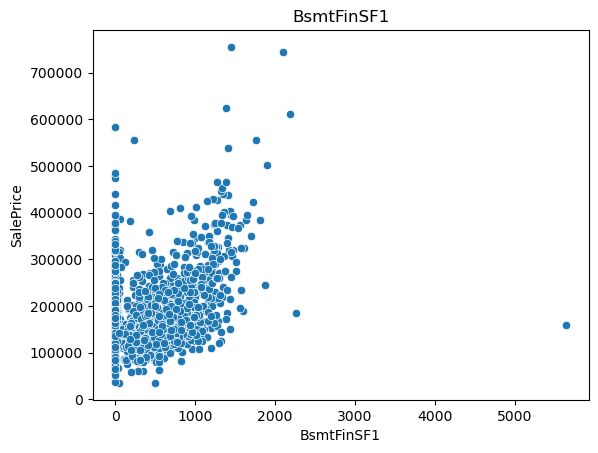

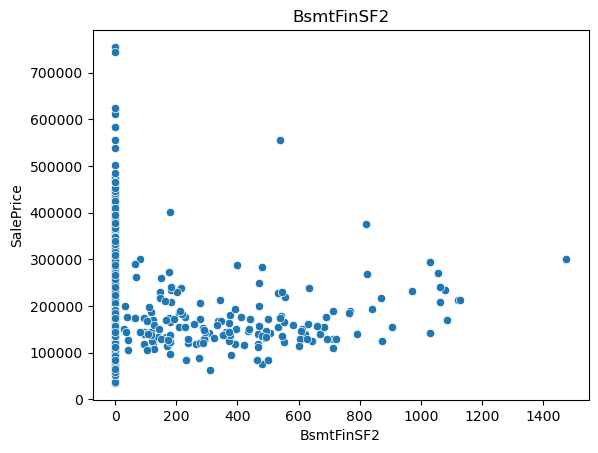

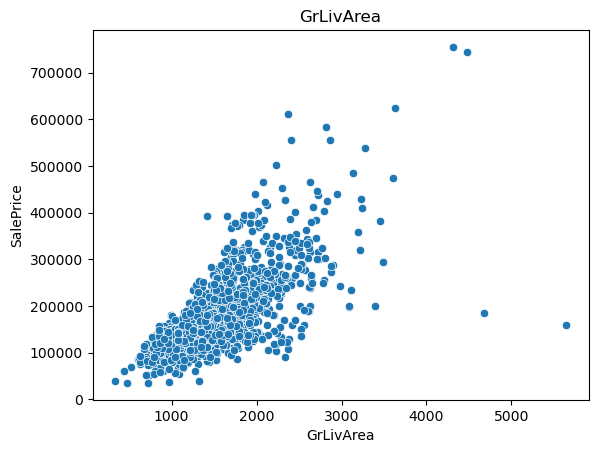

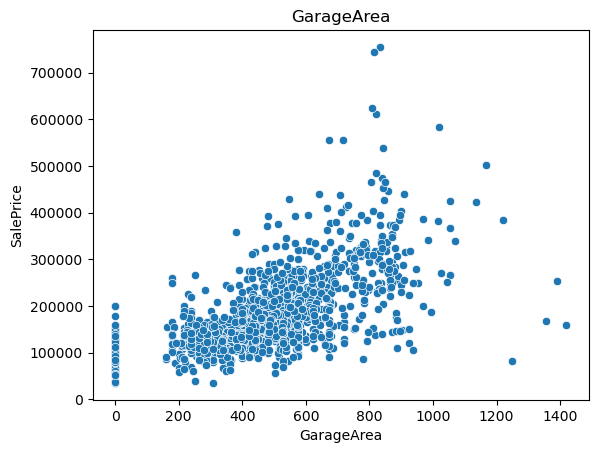

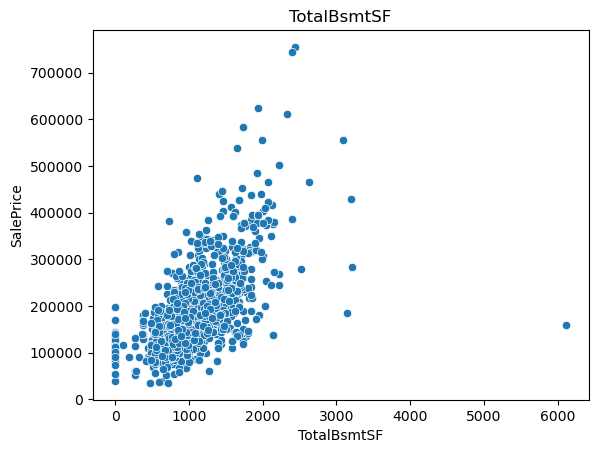

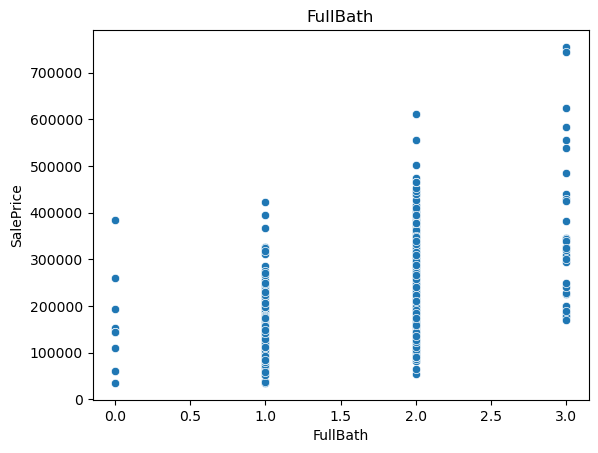

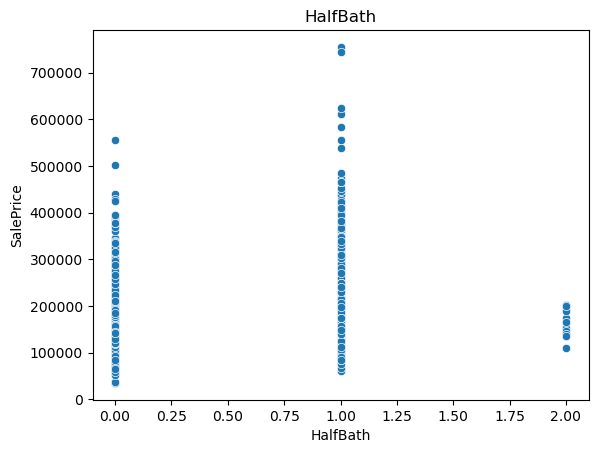

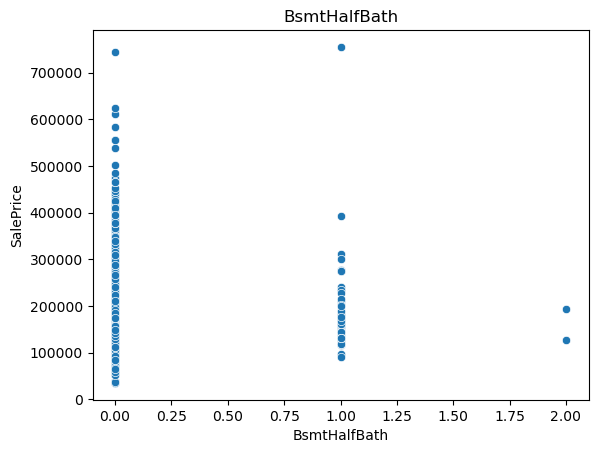

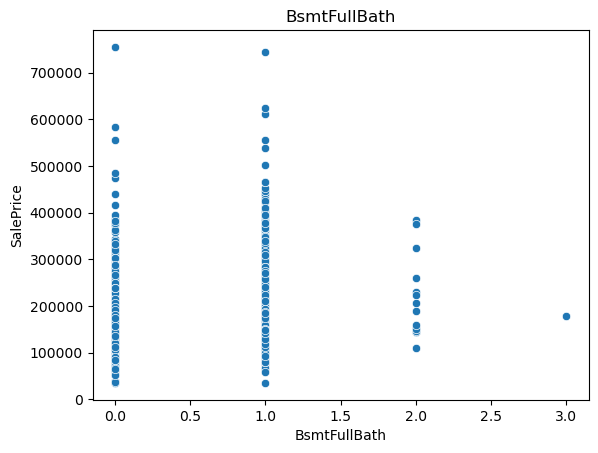

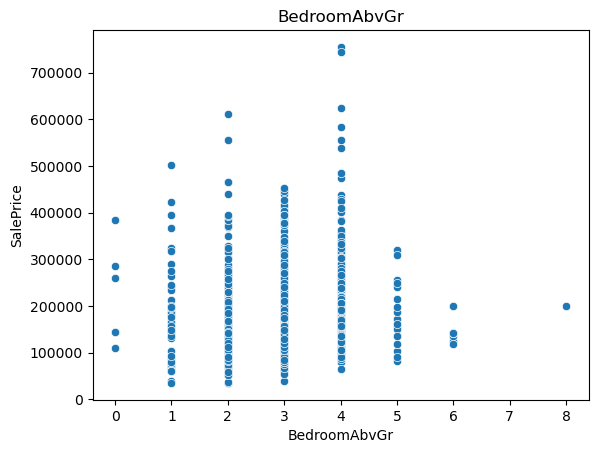

In [49]:
for col in num_columns.index:
    plt.figure()
    plt.title(col)
    sns.scatterplot(x=col, y='SalePrice', data=train_df)

In [50]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] +  (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] +  (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

C:\Users\T480\AppData\Local\Temp\ipykernel_17076\2413107812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
C:\Users\T480\AppData\Local\Temp\ipykernel_17076\2413107812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
C:\Users\T480\AppData\Local\Temp\ipykernel_17076\2413107812.py:7: SettingWithCopyWarning: 
A value i

In [51]:
train_df.head()

,SalePrice,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,GrLivArea,GarageArea,TotalBsmtSF,FullBath,HalfBath,BsmtHalfBath,BsmtFullBath,BedroomAbvGr,totalsf,totalarea,totalbaths
0,208500,856,854,706,0,1710,548,856,2,1,0,1,3,2416,2566,4
1,181500,1262,0,978,0,1262,460,1262,2,0,1,0,3,2240,2524,3
2,223500,920,866,486,0,1786,608,920,2,1,0,1,3,2272,2706,4
3,140000,961,756,216,0,1717,642,756,1,0,0,1,3,1933,2473,2
4,250000,1145,1053,655,0,2198,836,1145,2,1,0,1,4,2853,3343,4


In [52]:
test_df.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,GrLivArea,GarageArea,TotalBsmtSF,FullBath,HalfBath,BsmtHalfBath,BsmtFullBath,BedroomAbvGr,totalsf,totalarea,totalbaths
0,896,0,468.0,144.0,896,730.0,882.0,1,0,0.0,0.0,2,1508.0,1778.0,1.0
1,1329,0,923.0,0.0,1329,312.0,1329.0,1,1,0.0,0.0,3,2252.0,2658.0,2.0
2,928,701,791.0,0.0,1629,482.0,928.0,2,1,0.0,0.0,3,2420.0,2557.0,3.0
3,926,678,602.0,0.0,1604,470.0,926.0,2,1,0.0,0.0,3,2206.0,2530.0,3.0
4,1280,0,263.0,0.0,1280,506.0,1280.0,2,0,0.0,0.0,2,1543.0,2560.0,2.0


In [53]:
train_df = train_df.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF', 'FullBath', 'HalfBath','BsmtHalfBath','BsmtFullBath'])
test_df = test_df.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF', 'FullBath', 'HalfBath','BsmtHalfBath','BsmtFullBath'])

In [54]:
train_df.head()

,SalePrice,GarageArea,BedroomAbvGr,totalsf,totalarea,totalbaths
0,208500,548,3,2416,2566,4
1,181500,460,3,2240,2524,3
2,223500,608,3,2272,2706,4
3,140000,642,3,1933,2473,2
4,250000,836,4,2853,3343,4


In [55]:
test_df.head()

,GarageArea,BedroomAbvGr,totalsf,totalarea,totalbaths
0,730.0,2,1508.0,1778.0,1.0
1,312.0,3,2252.0,2658.0,2.0
2,482.0,3,2420.0,2557.0,3.0
3,470.0,3,2206.0,2530.0,3.0
4,506.0,2,1543.0,2560.0,2.0


In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   GarageArea    1460 non-null   int64
 2   BedroomAbvGr  1460 non-null   int64
 3   totalsf       1460 non-null   int64
 4   totalarea     1460 non-null   int64
 5   totalbaths    1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [58]:
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

In [59]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In [67]:
predictions = model.predict(X_test)

# Calculate Mean Squared Error

In [68]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1904523383.1912344


In [69]:
# calcul the RMSE and the R2
from sklearn.metrics import r2_score
from math import sqrt

rmse = sqrt(mse)
r2 = r2_score(y_test, predictions)

print("RMSE : ", rmse)
print("R2 : ", r2)

RMSE :  43640.84535376503
R2 :  0.7517024267616299


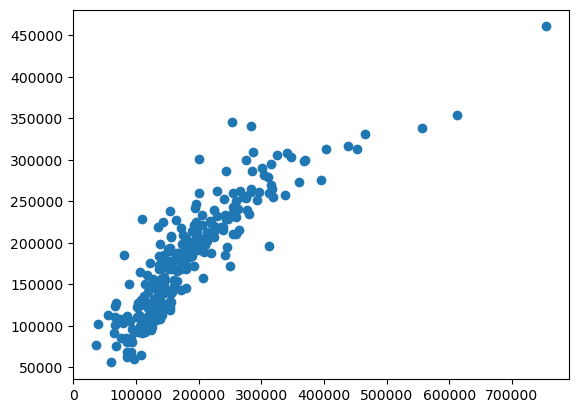

In [70]:
plt.scatter(y_test, predictions)

In [73]:
# Supposons que vous avez les valeurs des caractéristiques pour une nouvelle maison
new_house_features = [[1000, 3, 2000, 2500, 2]]  # Exemple de valeurs pour les caractéristiques

# Utilisez la méthode predict pour prédire le prix de la nouvelle maison
predicted_price = model.predict(new_house_features)

print("Prix prédit de la maison :", predicted_price)


Prix prédit de la maison : [209356.30897201]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
# Supposons que vous avez les valeurs des caractéristiques pour une nouvelle maison
new_house_features = [[1200, 3, 2300, 2490, 3]]  # Exemple de valeurs pour les caractéristiques

# Utilisez la méthode predict pour prédire le prix de la nouvelle maison
predicted_price = model.predict(new_house_features)

print("Prix prédit de la maison :", predicted_price)


Prix prédit de la maison : [244384.55109861]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
import pickle

# Sauvegarder le modèle
with open('modele.pkl', 'wb') as f:
    pickle.dump(model, f)
